## 본인이 크롤링해온 자료를 워드클라우드화 해 주세요

- 한글도 괜찮고 영문도 괜찮습니다.

- 워드클라우드화 시키는데 필요한 파일은 전부 같은 폴더에 둡니다.

-  배경 없이도 진행해보시고 본인이 찾은 배경 파일을 이용해서도 만들어보세요.

In [3]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pylab as plt

from konlpy.tag import Twitter
import nltk

import numpy as np
from PIL import Image

import requests
from bs4 import BeautifulSoup

In [11]:
article_url = 'https://www.yna.co.kr/politics/index?site=navi_politics_depth01'
url = requests.get(article_url)
source = url.text
soup = BeautifulSoup(source)

In [22]:
soup.find_all('ul','list')[0].find('div','news-con').get_text().strip()

'주호영 "윤미향 국정조사·국민 퇴출운동 벌여야"\n\n미래통합당 주호영 원내대표는 30일 각종 논란에 휩싸인 더불어민주당 윤미향 의원에 대해 "검찰 수사가 부족하다면 국정...'

In [31]:
soup.find_all('ul','list')[0].find('p','lead').get_text().strip()

'미래통합당 주호영 원내대표는 30일 각종 논란에 휩싸인 더불어민주당 윤미향 의원에 대해 "검찰 수사가 부족하다면 국정...'

In [46]:
soup.find_all('a','tit-wrap')[0]['href']

'//www.yna.co.kr/view/AKR20200530031500001?section=politics/all'

In [35]:
len(soup.find_all('div','item-box01'))

8

In [47]:
content = soup.find_all('a','tit-wrap')

In [62]:
url_list = []
for idx,i in enumerate(content):
    print(idx)
    url_list.append(i['href'])

0
1
2
3
4
5
6
7
8
9
10


In [51]:
url_list

['//www.yna.co.kr/view/AKR20200530031500001?section=politics/all',
 '//www.yna.co.kr/view/AKR20200530035300001?section=politics/all',
 '//www.yna.co.kr/view/PYH20200530019000013?section=photo/politics',
 '//www.yna.co.kr/view/AKR20200529133000064?section=society/all',
 '//www.yna.co.kr/view/AKR20200529120000504?section=nk/news/all',
 '//www.yna.co.kr/view/AKR20200529124600001?section=politics/all',
 '//www.yna.co.kr/view/AKR20200530024400104?section=safe/news',
 '//www.yna.co.kr/view/AKR20200529159100004?section=industry/all',
 '//www.yna.co.kr/view/AKR20200526120700505?section=economy/all',
 '//www.yna.co.kr/view/AKR20200529040100013?section=industry/all',
 '//www.yna.co.kr/view/AKR20200530005900087?section=international/all']

In [75]:
content = []
for i in url_list:
    url = requests.get(i)
    source = url.text
    soup = BeautifulSoup(source)
    try:
        p = soup.find('div','story-news article').find_all('p')
        for k in p:
            content.append(k.get_text())
    except:
        pass

In [77]:
import codecs

In [79]:
f = codecs.open('./article.txt',mode='a',encoding='utf-8')
for i in content:
    f.write(i)
    f.write('\r\n')
f.close()

In [63]:
for i in range(len(url_list)):
    url_list[i] = url_list[i].replace('//www.','https://')

In [64]:
url_list

['https://yna.co.kr/view/AKR20200530031500001?section=politics/all',
 'https://yna.co.kr/view/AKR20200530035300001?section=politics/all',
 'https://yna.co.kr/view/PYH20200530019000013?section=photo/politics',
 'https://yna.co.kr/view/AKR20200529133000064?section=society/all',
 'https://yna.co.kr/view/AKR20200529120000504?section=nk/news/all',
 'https://yna.co.kr/view/AKR20200529124600001?section=politics/all',
 'https://yna.co.kr/view/AKR20200530024400104?section=safe/news',
 'https://yna.co.kr/view/AKR20200529159100004?section=industry/all',
 'https://yna.co.kr/view/AKR20200526120700505?section=economy/all',
 'https://yna.co.kr/view/AKR20200529040100013?section=industry/all',
 'https://yna.co.kr/view/AKR20200530005900087?section=international/all']

In [65]:
url = requests.get(url_list[0])
source = url.text
soup = BeautifulSoup(source)

In [69]:
soup.find('div','story-news article').find('p').get_text()

' (서울=연합뉴스) 이슬기 기자 = 미래통합당 주호영 원내대표는 30일 각종 논란에 휩싸인 더불어민주당 윤미향 의원에 대해 "검찰 수사가 부족하다면 국정조사와 함께 국민이 나서서라도 국회의원 퇴출 운동을 벌여야 한다"고 밝혔다.'

In [82]:
text = open('./article.txt',encoding='utf-8').read()

In [83]:
t

' (서울=연합뉴스) 이슬기 기자 = 미래통합당 주호영 원내대표는 30일 각종 논란에 휩싸인 더불어민주당 윤미향 의원에 대해 "검찰 수사가 부족하다면 국정조사와 함께 국민이 나서서라도 국회의원 퇴출 운동을 벌여야 한다"고 밝혔다.\n 주 원내대표는 조계사에서 열린 \'부처님오신날 법요식\'에 참석한 뒤 기자들과 만나 "어제 윤 의원의 기자회견은 진땀만 뻘뻘 흘리면서 자기주장만 늘어놓은 것으로, 의혹 소명이 전혀 되지 않았고 오히려 확장한 것 같다"며 이같이 말했다.\n 주 원내대표는 "(의혹에 대해) 우리는 이해할 수 없다. 민주당 지도부가 왜 그렇게 감싸고 도는지 더더구나 이해할 수 없다"고 덧붙였다.\n 그러면서 "우리 국민들이 윤미향 같은 분을 국회의원으로 인정하겠나"라며 "지금 진행되는 수사가 조속히 마무리돼 진상을 명명백백히 밝혀야 할 것"이라고 강조했다. \n 원구성과 관려해선 "민주당은 자기들 주장대로 할테니 그냥 따라오라는 이야기"라며 "야당의 존립근거를 없애는 말이다. 우리도 국회법 날짜를 지키기 위해 노력하겠지만, 민주당의 일방 요구에 응하기 어렵다"고 못박았다.\n 일각에서 거론되는 당명 변경 가능성에 대해선 "당명 혹은 당 색깔도 필요하다면 모두 바꿀 준비가 돼 있다"며 "그러나 실질이 바뀌지 않고 당명만 바뀐다고 바뀌는 게 아니기 때문에, 모든 개혁의 마지막에 결정이 있을 것"이라고 말했다.\n(서울=연합뉴스) 신준희 기자 = 30일 종로구 조계사에서 열린 부처님오신날 법요식에서 더불어민주당 김태년 원내대표(오른쪽)와 미래통합당 주호영 원내대표가 나란히 합장하고 있다. 2020.5.30 hama@yna.co.kr\n wise@yna.co.kr\n<저작권자(c) 연합뉴스, 무단 전재-재배포 금지>2020/05/30 11:56 송고\n연합뉴스 자료사진\n (서울=연합뉴스) 이슬기 기자 = 미래통합당이 4·15 총선 참패 한 달 반 만에 당 재건 작업에 본격적으로 착수하면서 현재의 당명과 당 색깔(해피핑크)을 변경할지 주목된다.\n 통합당은 

In [84]:
t = Twitter()

C:\Users\82105\AppData\Local\Continuum\anaconda3\envs\tf2.0-gpu\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [86]:
token = t.nouns(text)

In [87]:
count_voca = nltk.Text(token,name='단어카운팅')

In [92]:
voca = count_voca.vocab()

In [89]:
background = np.array(Image.open('data/stormtrooper.png'))
print(background)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [101]:
print(len(count_voca.tokens))
print(len(set(count_voca.tokens)))

a = count_voca.vocab().most_common(150)

1922
901


In [108]:
a = dict(a)

In [111]:
del a['것']

In [112]:
del a['것']

{'연합뉴스': 27,
 '면접': 26,
 '기자': 23,
 '말': 17,
 '수': 17,
 '재': 17,
 '준비': 14,
 '등': 14,
 '당선인': 14,
 '그': 13,
 '통합': 12,
 '민주당': 12,
 '고': 12,
 '화상': 11,
 '서울': 10,
 '윤': 10,
 '금지': 10,
 '국회': 10,
 '원금': 10,
 '코로나': 10,
 '미래': 9,
 '위해': 9,
 '명': 9,
 '송': 9,
 '재난': 9,
 '전': 9,
 '모습': 9,
 '뒤': 8,
 '며': 8,
 '당': 8,
 '때문': 8,
 '저작권': 8,
 '무단': 8,
 '배포': 8,
 '저': 8,
 '훈련': 8,
 '원내대표': 7,
 '윤미향': 7,
 '의혹': 7,
 '사진': 7,
 '지난': 7,
 '지급': 7,
 '가구': 7,
 '질문': 7,
 '곤': 7,
 '대해': 6,
 '모두': 6,
 '수령': 6,
 '경우': 6,
 '세대주': 6,
 '통관': 6,
 '입장': 6,
 '목소리': 6,
 '후': 6,
 '다시': 6,
 '제': 6,
 '서명': 6,
 '국민': 5,
 '기자회견': 5,
 '라며': 5,
 '색깔': 5,
 '때': 5,
 '씨': 5,
 '단독': 5,
 '더': 5,
 '오후': 5,
 '정장': 5,
 '점': 5,
 '땀': 5,
 '장소': 5,
 '사태': 5,
 '로이터': 5,
 '자메이카': 5,
 '주호영': 4,
 '각종': 4,
 '지금': 4,
 '변경': 4,
 '선': 4,
 '모든': 4,
 '결정': 4,
 '자료': 4,
 '달': 4,
 '신청': 4,
 '대한': 4,
 '지원': 4,
 '자신': 4,
 '날': 4,
 '취재': 4,
 '이': 4,
 '두': 4,
 '촬영': 4,
 '쿠팡': 4,
 '반품': 4,
 '물품': 4,
 '조언': 4,
 '카페': 4,
 '화면': 4,
 '료': 4,
 '커피숍': 4,


In [106]:
len(a)

150

In [93]:
font_path = 'C:/Windows/Fonts/batang.ttc'
wordcloud = WordCloud(font_path = font_path,
                     relative_scaling=0.2,
                     mask=background,
                     background_color='black').generate_from_frequencies(dict(voca))

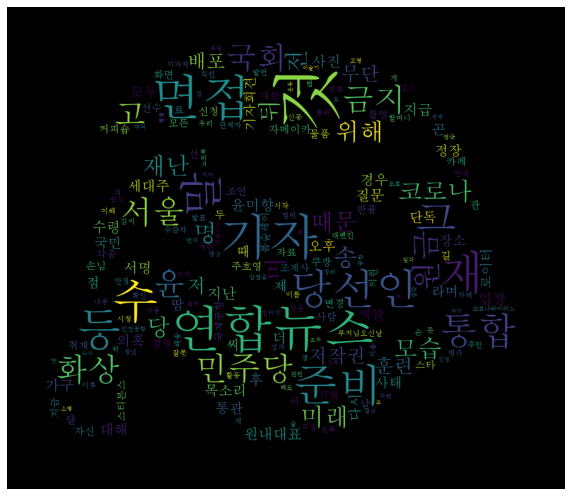

In [95]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()